# Lab 05 Logistic Classification(Regression)
* Logistic Classfication은 True or False와 같은 Binary나 복수개의 다항 분류에 활용
  - Bernoulli Distribution

In [ ]:
# 구글 드라이브 사용시
from google.colab import drive
drive.mount('/content/drive')
path = ''

Mounted at /content/drive


In [1]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


In [ ]:
tf.set_random_seed(777)  # for reproducibility

In [ ]:
x_data = [[1, 2],
          [2, 3],
          [3, 1],
          [4, 3],
          [5, 3],
          [6, 2]]
y_data = [[0],
          [0],
          [0],
          [1],
          [1],
          [1]]

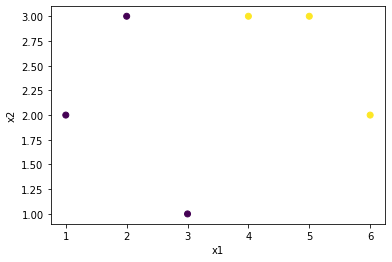

In [ ]:
##############################
# Data 시각화
# x_data는 2차원 배열 - 2차원 공간에 표현하여 x1과 x2를 기준으로 y_data 0과 1로 구분
# Logistic Classification - 보라색과 노란색 y_data(Label)을 구분
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x1 = [x[0] for x in x_data]
x2 = [x[1] for x in x_data]
colors = [y[0] for y in y_data]

plt.scatter(x1,x2, c=colors)

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [ ]:
# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([2,1]), name='weight') # tf.zeros([2, 1]) 초깃값은 0 혹은 랜덤값 활용
b = tf.Variable(tf.random_normal([1]), name='bias')

In [ ]:
# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W) + b))
hypothesis  = tf.sigmoid(tf.matmul(X, W) + b)

In [ ]:
# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))

# cost 함수의 미분값으로 gradient descent 경사 하강법 이용 
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost) 

In [ ]:
# Accuracy computation
# True(1) if hypothesis > 0.5 else False(0)
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32) # 타입이 float32이므로 0 or 1로 캐스팅 
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.int32)) # 예측이 맞으면 T(1)

In [ ]:
# Launch graph
with tf.Session() as sess:
  # Initialize TensorFlow variables
  sess.run(tf.global_variables_initializer())

  for step in range(10001):
    cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
    if step % 1000 == 0: # 200
      print(step, cost_val)

  # Accuracy report
  h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
  print("\nHypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)

0 1.7307833
1000 0.42857108
2000 0.35999325
3000 0.30948088
4000 0.2699997
5000 0.23870273
6000 0.21353154
7000 0.19297928
8000 0.17595184
9000 0.16165248
10000 0.14949557

Hypothesis:  [[0.03074028]
 [0.15884678]
 [0.30486736]
 [0.78138196]
 [0.93957496]
 [0.9801688 ]] 
Correct (Y):  [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]] 
Accuracy:  1


In [ ]:
# load data
xy = np.loadtxt(path +'data-03-diabetes.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

print(x_data.shape, y_data.shape)

(759, 8) (759, 1)


In [ ]:
# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 8])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([8, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

In [ ]:
# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(-tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

In [ ]:
# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [ ]:
# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [ ]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
        if step % 1000 == 0:
            print(step, cost_val)

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)

0 0.9742218
200 0.73380584
400 0.6805429
600 0.65738314
800 0.640506
1000 0.6259895
1200 0.6130378
1400 0.6013964
1600 0.59091467
1800 0.58146954
2000 0.57295156
2200 0.5652617
2400 0.5583116
2600 0.55202144
2800 0.54632044
3000 0.5411451
3200 0.53643954
3400 0.5321536
3600 0.5282433
3800 0.5246693
4000 0.5213968
4200 0.5183954
4400 0.5156375
4600 0.5130991
4800 0.5107587
5000 0.50859725
5200 0.5065978
5400 0.50474524
5600 0.5030261
5800 0.50142837
6000 0.49994123
6200 0.4985551
6400 0.49726114
6600 0.49605194
6800 0.49492022
7000 0.49385956
7200 0.49286464
7400 0.49193004
7600 0.49105117
7800 0.4902238
8000 0.48944402
8200 0.48870835
8400 0.48801363
8600 0.487357
8800 0.48673567
9000 0.4861472
9200 0.4855895
9400 0.48506045
9600 0.4845582
9800 0.4840809
10000 0.48362702

Hypothesis:  [[0.37003183]
 [0.9154805 ]
 [0.21602729]
 [0.9483494 ]
 [0.08354768]
 [0.7647524 ]
 [0.94660914]
 [0.6240098 ]
 [0.24575189]
 [0.53068644]
 [0.70052207]
 [0.17214665]
 [0.16543272]
 [0.2199429 ]
 [0.7124

In [ ]:
 # tf.decode_csv 를 활용해보기!!!